In [129]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
import os
import pandas as pd

In [131]:
# Get the current directory
_dir = "../DataSets/IMDB_Urdu_Reviews"
file = _dir + "/preprocessed.csv"
df = pd.read_csv(file)

In [156]:
df.head()

,lemmatized_text,encoded_sentiments,tokens
0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,1,"['دہائی', 'وسط', 'کیبل', 'گائیڈ', 'اسکائینجر',..."
1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,0,"['دہائی', 'انسپکٹر', 'گیجٹ', 'کارٹون', 'پسند',..."
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,1,"['معاشرے', 'حالت', 'تعجب', 'والد', 'پیدا', 'ال..."
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,0,"['مفید', 'البرٹ', 'پیون', 'ردی', 'ٹوکری', 'گری..."
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,1,"['کولمبو', 'ہدایتکاری', 'کیریئر', 'ابتدائی', '..."


In [136]:
reviews = df["lemmatized_text"]


In [135]:
# reviews = ['nice food',
#         'amazing restaurant',
#         'too good',
#         'just loved it!',
#         'will go there again',
#         'horrible food',
#         'never go there',
#         'poor service',
#         'poor quality of food',
#         'needs improvement']

# sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [102]:
one_hot("amazing restaurant", 30)

[11, 9]

In [137]:
vocab_size = max([len(w) for w in reviews])

In [140]:
encoded_reviews = [one_hot(rev, vocab_size) for rev in reviews]

In [160]:
max_len = max([len(review.split()) for review in reviews])

In [153]:
max_len

1398

In [154]:
padded = pad_sequences(encoded_reviews, max_len, padding='post')

In [157]:
X = padded
y = df.encoded_sentiments

In [267]:
embeded_vector_size = 90

In [275]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [270]:
def plotHistory(history):
    training_loss = history.history['loss']
    training_accuracy = history.history['accuracy']
    validation_loss = history.history['val_loss']
    validation_accuracy = history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].plot(training_loss, label='Training Loss')
    axes[0].plot(validation_loss, label='Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].legend()

    axes[1].plot(training_accuracy, label='Training Accuracy')
    axes[1].plot(validation_accuracy, label='Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

def Evaluate(model, X, y):
    loss, accuracy = model.evaluate(X, y)
    
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    
    print(classification_report(y, y_pred))
    
    precision, recall, f1_score, support = precision_recall_fscore_support(y, y_pred, average='binary')

    print()
    print("Accuracy   : ", accuracy)
    print("Loss       : ", loss)
    print("Precision  : ", precision)
    print("Recall     : ", recall)
    print("F1-Score   : ", f1_score)
    print("Support    : ", support)

In [283]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [276]:
ANN = Sequential()
ANN.add(Embedding(vocab_size, embeded_vector_size, input_length=max_len, name="ANN_embedding"))
ANN.add(Flatten())
ANN.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.5))
ANN.add(Dense(1, activation='sigmoid'))

ANN.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
print(ANN.summary())

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ANN_embedding (Embedding)   (None, 1398, 90)          646560    
                                                                 
 flatten_34 (Flatten)        (None, 125820)            0         
                                                                 
 dense_90 (Dense)            (None, 32)                4026272   
                                                                 
 dense_91 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,672,865
Trainable params: 4,672,865
Non-trainable params: 0
_________________________________________________________________
None


In [277]:
ANN_History = ANN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
1250/1250 [==============================] - 91s 73ms/step - loss: 0.5987 - accuracy: 0.7089 - val_loss: 0.4721 - val_accuracy: 0.8222
Epoch 2/10
1250/1250 [==============================] - 87s 70ms/step - loss: 0.4329 - accuracy: 0.8434 - val_loss: 0.4492 - val_accuracy: 0.8348
Epoch 3/10
1250/1250 [==============================] - 88s 71ms/step - loss: 0.4028 - accuracy: 0.8622 - val_loss: 0.4778 - val_accuracy: 0.8365
Epoch 4/10
1250/1250 [==============================] - 87s 69ms/step - loss: 0.3732 - accuracy: 0.8864 - val_loss: 0.4847 - val_accuracy: 0.8363
Epoch 5/10
1250/1250 [==============================] - 88s 70ms/step - loss: 0.3152 - accuracy: 0.9291 - val_loss: 0.5503 - val_accuracy: 0.8230


313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      4892
           1       0.85      0.79      0.82      5108

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000


Accuracy   :  0.8230000138282776
Loss       :  0.5503202080726624
Precision  :  0.8524070945945946
Recall     :  0.7903288958496476
F1-Score   :  0.8201950426655832
Support    :  None


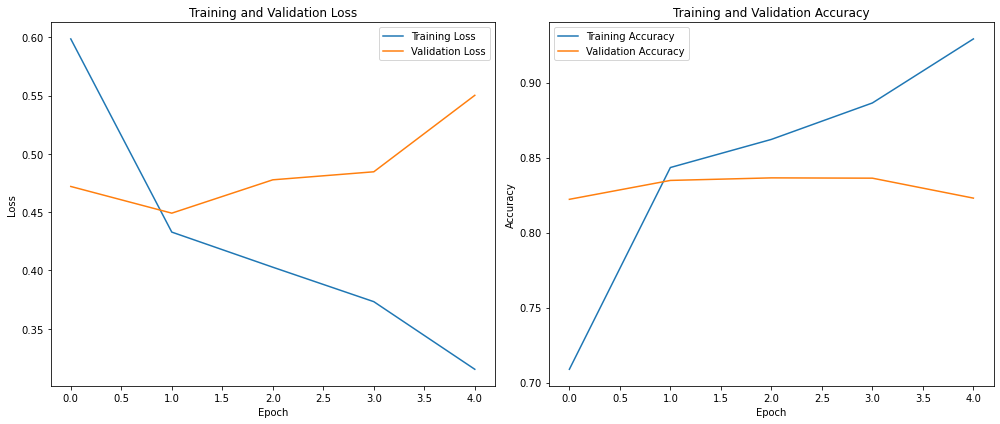

In [278]:
Evaluate(ANN, X_test, y_test)
plotHistory(ANN_History)

In [279]:
ANN.save('ANN_E_F_D32_D1.h5')

In [280]:
from tensorflow.keras.layers import SimpleRNN

In [284]:
RNN = Sequential([
    Embedding(vocab_size, embeded_vector_size, input_length=max_len),
    SimpleRNN(units=256, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=256),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

RNN.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
print(RNN.summary())

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 1398, 90)          646560    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1398, 256)         88832     
                                                                 
 dropout_34 (Dropout)        (None, 1398, 256)         0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 256)               131328    
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_93 (Dense)            (None, 64)                16448     
                                                                 
 dropout_36 (Dropout)        (None, 64)              

In [286]:
RNN_history = RNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, callbacks=[early_stopping])

Epoch 1/15
1250/1250 [==============================] - 9552s 8s/step - loss: 0.6941 - accuracy: 0.5027 - val_loss: 0.6926 - val_accuracy: 0.5139
Epoch 2/15
1250/1250 [==============================] - 9502s 8s/step - loss: 0.6941 - accuracy: 0.5038 - val_loss: 0.6940 - val_accuracy: 0.4965
Epoch 3/15
1250/1250 [==============================] - 6470s 5s/step - loss: 0.6938 - accuracy: 0.5032 - val_loss: 0.6936 - val_accuracy: 0.5108
Epoch 4/15
1250/1250 [==============================] - 6458s 5s/step - loss: 0.6942 - accuracy: 0.5033 - val_loss: 0.6992 - val_accuracy: 0.4845


313/313 [==============================] - 419s 1s/step
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      4892
           1       0.53      0.51      0.52      5108

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000


Accuracy   :  0.5138999819755554
Loss       :  0.6926244497299194
Precision  :  0.5250354753699574
Recall     :  0.5070477682067346
F1-Score   :  0.5158848720246987
Support    :  None


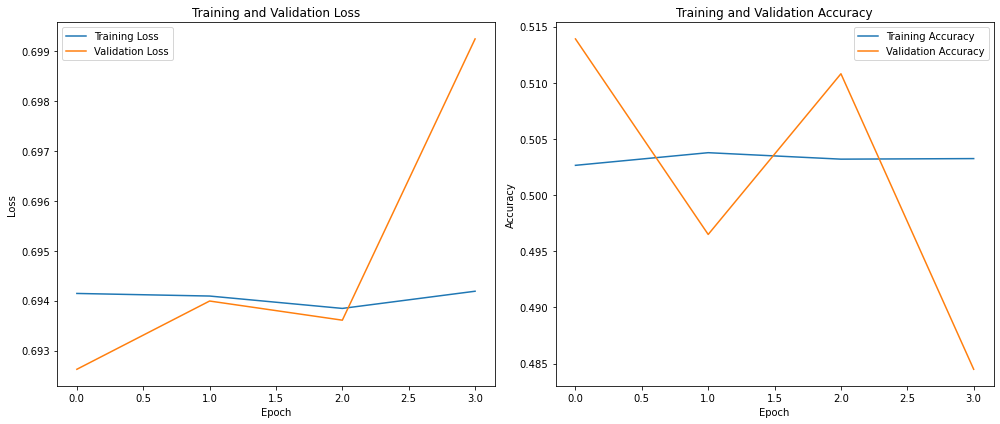

In [287]:
Evaluate(RNN, X_test, y_test)
plotHistory(RNN_history)

In [288]:
RNN.save('RNN_E_R64_D1.h5')

In [289]:
RNN2 = Sequential([
    Embedding(vocab_size, embeded_vector_size, input_length=max_len),
    SimpleRNN(units=64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    SimpleRNN(units=32, kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

RNN2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(RNN2.summary())

RNN2_history = RNN2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, callbacks=[early_stopping])

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 1398, 90)          646560    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1398, 64)          9920      
                                                                 
 dropout_37 (Dropout)        (None, 1398, 64)          0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_38 (Dropout)        (None, 32)                0         
                                                                 
 dense_95 (Dense)            (None, 1)                 33        
                                                                 
Total params: 659,617
Trainable params: 659,617
Non-t

KeyboardInterrupt: 

RNN2.save('RNN_E_R64_dr_R32_dr_D1.h5')

In [ ]:
Evaluate(RNN2, X_test, y_test)
plotHistory(RNN2_history)

In [290]:
from tensorflow.keras.layers import LSTM

In [ ]:
# Define the model
LSTM = Sequential([
    Embedding(vocab_size, embeded_vector_size, input_length=max_len),
    LSTM(units=128, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='tanh'),
    Dropout(0.1),
    Dense(32, activation='tanh'),
    Dropout(0.1),
#     Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(LSTM.summary())

LSTM_history = LSTM.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, callbacks=[early_stopping])

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 1398, 90)          646560    
                                                                 
 lstm (LSTM)                 (None, 128)               112128    
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_96 (Dense)            (None, 64)                8256      
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 dropout_41 (Dropout)        (None, 32)              

In [ ]:
Evaluate(LSTM, X_test, y_test)
plotHistory(LSTM_history)

In [ ]:
LSTM.save('LSTM_E_L64_D1.h5')

In [ ]:
RNN = Sequential([
    Embedding(vocab_size, embeded_vector_size, input_length=max_len),
    SimpleRNN(units=256, return_sequences=True),
    Dropout(0.3),
    SimpleRNN(units=256),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [ ]:
RNN.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
print(RNN.summary())

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

RNN_history = RNN.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, callbacks=[early_stopping])

In [ ]:
Evaluate(RNN, X_test, y_test)
plotHistory(RNN_history)